Choose one or two of the images on the web or use an image of your own choice.  If you use a different image, be careful that the image has not been saved under JPEG using a high level of compression.  This often introduces artifacts into the image that confound subsequent analyses of the results.  For the most part, you should apply your operators to a gray-scale version of the image. 

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import argparse

%matplotlib inline

1. (20 points) Generate the [histogram](https://datacarpentry.org/image-processing/05-creating-histograms/) of the image you are using, and then perform a number of histogram operations (at least including contrast enhancement, thresholding, and [equalization](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)) to make the image visually better for either viewing or processing (10 points).  If it is a color image,  please first turn it into an intensity image and then generate its histogram.  Try to display your histograms of the original and the processed images (5 points), and make some observations of the images based on their histograms (5 points). What are the general distributions of the intensity values of each histogram? How many major peaks and valleys does your histogram have, and how do they behave? How could you use the histograms to understand, analyze or segment the image?

In [4]:
'''Import Image'''

InputImage = 'AWEBImage.jpg'#There is a difference btwn .jpeg and jpg. jpg is a Web Image. jpeg may be compressed.
InputImage = plt.imread(InputImage)

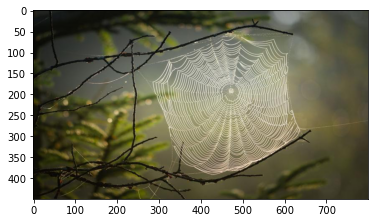

In [5]:
plt.imshow(InputImage)

https://researchmatters.in/news/weaving-web-wonder

In [6]:
C = np.array(InputImage)
C

array([[[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [65, 69, 54],
        [65, 69, 52],
        [65, 69, 52]],

       [[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [66, 70, 55],
        [65, 69, 52],
        [65, 69, 52]],

       [[29, 25, 16],
        [30, 26, 17],
        [31, 27, 18],
        ...,
        [66, 70, 55],
        [66, 70, 55],
        [65, 69, 54]],

       ...,

       [[12, 11,  6],
        [12, 11,  6],
        [12, 11,  6],
        ...,
        [47, 44, 27],
        [47, 44, 27],
        [47, 44, 27]],

       [[13, 12,  8],
        [13, 12,  8],
        [13, 12,  8],
        ...,
        [49, 46, 29],
        [49, 46, 29],
        [50, 47, 30]],

       [[13, 12,  8],
        [13, 12,  8],
        [13, 12,  8],
        ...,
        [49, 46, 29],
        [49, 46, 29],
        [50, 47, 30]]], dtype=uint8)

In [7]:
C.shape

(450, 800, 3)

In [8]:
C[:,:,].shape

(450, 800, 3)

In [9]:
'''create the histogram'''

def imageGray(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    grayScale = 0.2989*R + 0.5870*G + 0.1140*B
    #grayScale = np.stack((0.2989*R, 0.5870*G, 0.1140*B),axis=2)
    return grayScale

def imagePeak(image):
    cleanImage = image[np.logical_not(np.isnan(image))]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    return histogram, bin_edges

def imageHist(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized, hist, bins

def imageEqualize(image,cdf):
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*256/(cdf_m.max()-cdf_m.min())
    cdf_out = np.ma.filled(cdf_m,0)#.astype('uint8')
    return cdf_out[image]

# Grayscale Peaks

In [10]:
grayImage = imageGray(np.copy(C))

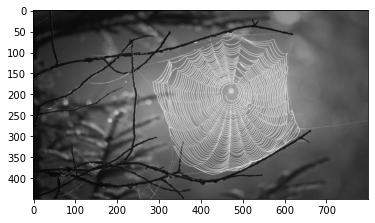

In [11]:
plt.imshow(grayImage,cmap='gray')

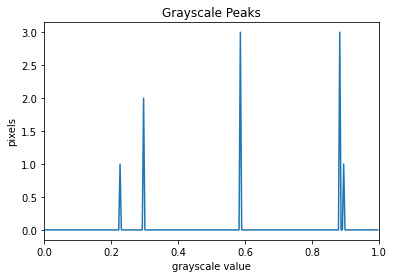

In [12]:
'''configure and draw the histogram figure'''

plt.figure()
plt.title("Grayscale Peaks")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

grayImage = imageGray(np.copy(C))
histogram, bin_edges = imagePeak(np.copy(grayImage))

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

### The histogram has 5 peaks (and 7 valleys) for the grayscale. The two major peaks are likely corresponding to the web and twigs in the foreground. The remaing peaks most likely pertain to interpretable elements in the background such as the tree branches, highlights, and leaves. The distribution at first looks random, but the 3 major peaks seem to be evenly spread out, which resembles modal behavior. Compared to the color histogram, the grayscale histogram readily interprets background behavior in additon to foreground behavior. By using functions for contrast enhancement, equalization, and threshold we begin to identify which elements in the foreground and background are segmented relative to the peaks of the histogram.

# Grayscale Histogram

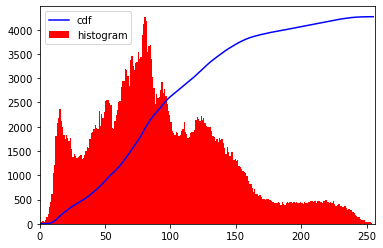

In [13]:
cdf_normalized, hist, bins = imageHist(np.copy(grayImage))

plt.plot(cdf_normalized, color = 'b')
plt.hist(np.copy(grayImage).flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Equalized

In [14]:
imgEQL = imageEqualize(np.copy(C),cdf_normalized)

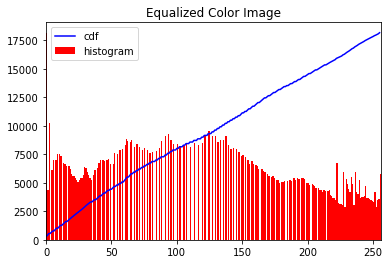

In [18]:
cdf_normalized,hist,bins = imageHist(np.copy(imgEQL))

plt.plot(cdf_normalized, color = 'b')
plt.hist(imgEQL.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Equalized Color Image')
plt.show()


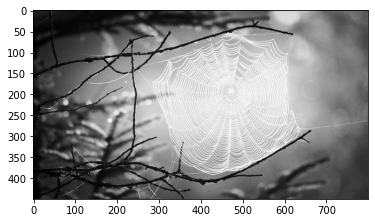

In [19]:
imgGrayEQL = imageGray(imgEQL)
plt.imshow(imgGrayEQL, cmap='gray')

# The image is brighter and the extreme dark and lights are saturated providing a sharper image i.e. better segmentation.

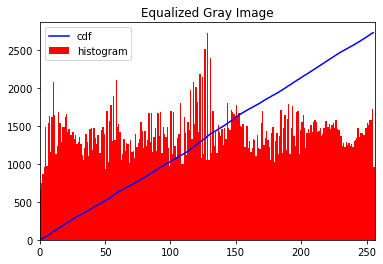

In [21]:
cdf_normalized,hist,bins = imageHist(imgGrayEQL)

plt.plot(cdf_normalized, color = 'b')
plt.hist(imgGrayEQL.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Equalized Gray Image')
plt.show()

# In grayscale, the contrast is readily seen. The image enhancement is sharpened by doing an empirical cdf. Finally thresholding (quantization) and equalization (clipping) puts back gradation in the gray image elements after its been segmented: this is done by using the cdf as a mask or filter.

2. (20 points) Apply BOTH the 1×2 operator and [Sobel](http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/) operator to your image and analyze and compare the results of the gradient magnitude images (including vertical gradients, horizontal gradients, and the combined) (10 points). Please don’t forget to normalize your gradient images, noting that the original vertical and horizontal gradients have both positive and negative values. I would recommend you to display the absolute values of the horizontal and vertical gradient images.  Does the Sobel operator have any clear visual and processing advantages over the 1×2 operator? Any disadvantages (5 points)? If you subtract the normalized 1×2 gradient image from the normalized Sobel gradient image, are there any residuals? You might use two different types of images: one ideal man-made image, and one image of a real scene with more details (5 points). (Note: don’t forget to normalize your results as shown in the slides of  feature extraction lecture: part 2)

In [29]:
import matplotlib.pyplot as plt
import math

In [30]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D


def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)


def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

In [31]:
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude

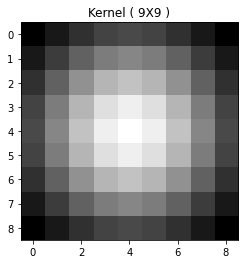

Found 3 Channels : (450, 800, 3)
Converted to Gray Channel. Size : (450, 800)
Kernel Shape : (9, 9)


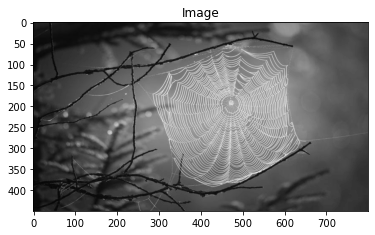

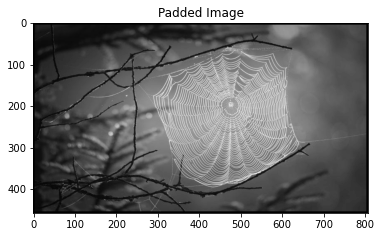

Output Image size : (450, 800)


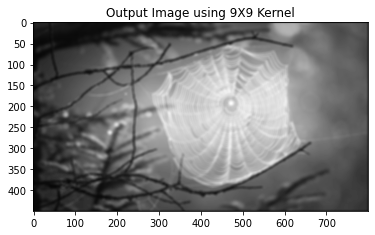

In [161]:
filters = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

image = cv2.imread('AWEBImage.jpg')
image = gaussian_blur(image, 9, verbose=True)


Image Shape : (450, 800)
Kernel Shape : (3, 3)
Output Image size : (450, 800)


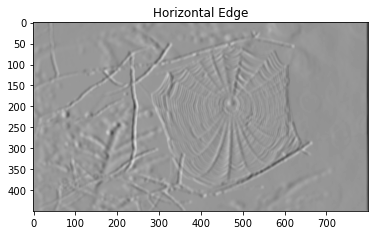

Image Shape : (450, 800)
Kernel Shape : (3, 3)
Output Image size : (450, 800)


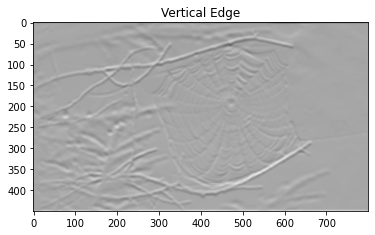

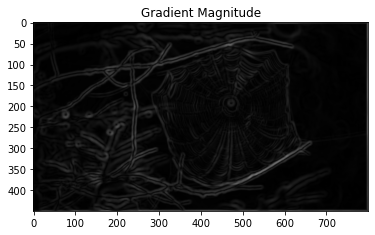

In [162]:
sobelImage = sobel_edge_detection(image, filters, verbose=True)

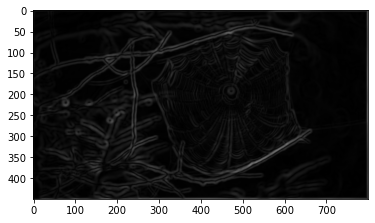

In [34]:
plt.imshow(sobelImage, cmap='gray')

# The sobel operator is an edge detection technique that emphasizes edges using a formulation of gradient descent over 3x3 matrix. It takes a larger matrix into consideration therefore you have smoother transitions- more grays. versus the 1x2 operator is effectively. For the 1x2 operator the edge detection image looks closer to the binary image of quantization with k=2 or 4. The 1x2 operator is more computationally efficient.

In [44]:
def oneByTwo(img):
    (h, w) = img.shape
    imgInt = img.astype('uint8')
    kernel = [-1, 1]
    img_h = np.zeros(imgInt.shape)
    img_v = np.zeros(imgInt.shape)
    for i in range(h):
        for j in range(w):
            if j != 0:
                img_v[i, j] = np.dot([imgInt[i, j-1], imgInt[i,j]], [-1, 1])
            if i < h-1:
                img_h[i,j] = np.dot([imgInt[i, j], imgInt[i+1, j]], [-1, 1])
    convolved = img_h + img_v
    return convolved

In [45]:
img1x2 = oneByTwo(grayImage)

Image Shape : (450, 800)
Kernel Shape : (2, 2)
Output Image size : (450, 800)


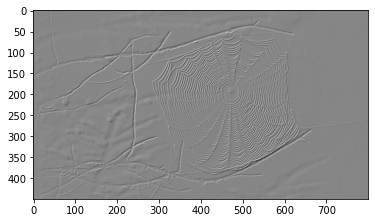

In [57]:
plt.imshow(gaussian_blur(img1x2,2), cmap='gray')

Image Shape : (450, 800)
Kernel Shape : (2, 2)
Output Image size : (450, 800)


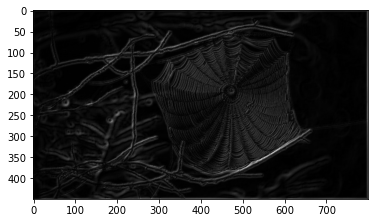

In [56]:
resAWebImage= abs(gaussian_blur(img1x2,2)-sobelImage)
plt.imshow(resAWebImage,cmap='gray')

# As we can see there is a significant residual when we take the difference between sobel and the 1x2 operator. The sobel operator has a lot more detail. Lets see how it compares to a man made [image](https://www.biospace.com/article/stop-the-conspiracy-theories-novel-coronavirus-has-natural-origin/).

In [60]:
AManMadeImage = 'AManMadeImage.jpeg'
manImage = plt.imread(AManMadeImage)
manGray = imageGray(np.array(manImage))

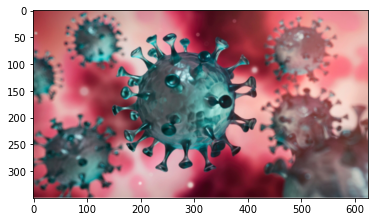

In [61]:
plt.imshow(manImage)

Image Shape : (350, 625)
Kernel Shape : (3, 3)
Output Image size : (350, 625)


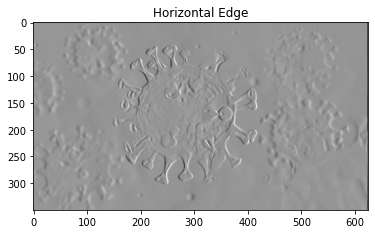

Image Shape : (350, 625)
Kernel Shape : (3, 3)
Output Image size : (350, 625)


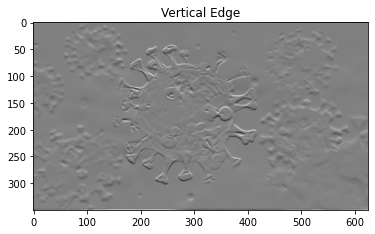

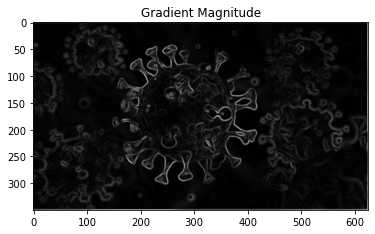

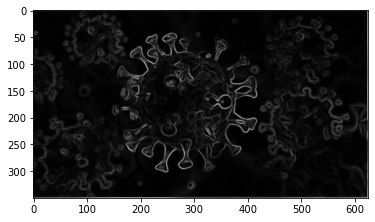

In [63]:
sobelMan = sobel_edge_detection(manGray, filter, verbose=True)
plt.imshow(sobelMan, cmap = 'gray')

Found 3 Channels : (350, 625, 3)
Converted to Gray Channel. Size : (350, 625)
Kernel Shape : (2, 2)
Output Image size : (350, 625)


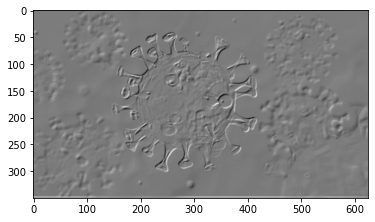

In [64]:
man1x2= oneByTwo(gaussian_blur(manImage,2))
plt.imshow(man1x2, cmap='gray')

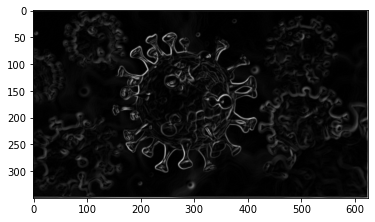

In [65]:
resManImage= abs(man1x2-sobelMan)
plt.imshow(resManImage,cmap='gray')

# For the manmade image, both sobel and the 1x2 operator offer similar level of details judging from the their difference. For man made image it is better to use 1x2 operator as you can gain the same amount of detail with few compuation.

3. (20 points) Generate [edge maps](https://datacarpentry.org/image-processing/08-edge-detection/) of the above two combined gradient maps (10 points).  An edge image should be a binary image with 1s as edge points and 0s as non-edge points. You may first generate a histogram of each combined gradient map,  and only keep certain percentage of pixels  (e.g.  5% of the pixels with the highest gradient  values) as edge pixels (edgels) . Please study what is the best percentage for a specific image, and why. Use the varying percentage to automatically find a corresponding threshold for the gradient magnitudes, and then pick up the one having the best visual performance. In your report, please write up the description and probably equations for finding the threshold, and discuss what percentage is a good value (5 points). You may also consider to use local, adaptive thresholds to different portions of the image so that all major edges will be shown up nicely (5 points). In the end, please try to generate a sketch of an image, such as the ID image of Prof. Zhu.

(array([[  0.,   0.,   0., ...,   4.,   0.,   0.],
        [  0., 197., 130., ...,   1.,   0.,   0.],
        [  0., 198., 123., ...,   1.,   0.,   0.],
        ...,
        [  0., 232.,  95., ...,   1.,   1.,   0.],
        [  0., 231.,  97., ...,   1.,   1.,   0.],
        [  0.,   0.,   0., ...,  57., 108.,  88.]]),
 array([-57.62707959, -25.16263419,   7.3018112 ,  39.7662566 ,
         72.230702  , 104.6951474 , 137.15959279, 169.62403819,
        202.08848359, 234.55292898, 267.01737438]),
 <a list of 625 BarContainer objects>)

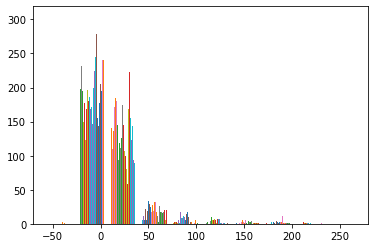

In [67]:
combo = man1x2+sobelMan
plt.hist(combo)

# For edgemaps the standard deviation about the mean is great start for where to choose your threshold. Since the histogram has a logarithmic shape it follows a curve similar to a skewed normal distribution. Since most of the pixels will be near zero for after applying a gradient operator, you choose either the values all above or below zero, which ever will give you the minimal number of values. You set the chosen side to 1 as range and the opposite side of that domain to 0 as binary response for the pixels. This is a pseudo canny edge detection technique. To optimize the number of pixels percentage necessary you have to iterate. Depending on the type of image the percentage can range from 5% to as much as 58.7% as a gross upper bound. 

In [122]:
import skimage, skimage.feature

def canny(image,sigma,low_threshold,high_threshold):
    edges = skimage.feature.canny(image=image,
        sigma=sigma,
        low_threshold=low_threshold,
        high_threshold=high_threshold)
    return edges


def edgemap(image):#WIP
    npIMG = np.array(image)
    
    x,y = npIMG.shape
    
    edges = np.copy(npIMG)
    edges[edges<0]=0
    edges[edges>0]=1
    
    if edges.sum() > (1-edges).sum():
        edges = 1-edges
   
    print(f'Your percent of pixels for edgemap is {edges.sum()/(x*y)*100}')   
    return edges

Your percent of pixels for edgemap is 3.1776


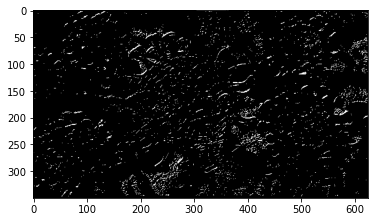

In [117]:
edges = edgemap(combo)
plt.imshow(edges, cmap='gray')

# Since this image doesn't look very good we use an adaptive method. to obtain more pixels.

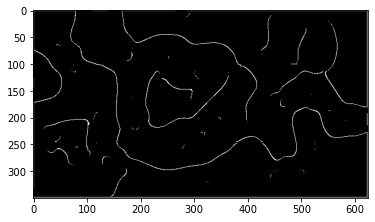

In [124]:
edgesC = canny(combo,np.std(combo),-50, 0)
plt.imshow(edgesC,cmap='gray')

4. (20 points) What happens when you increase the size of the edge detection kernel from 1×2 to 3×3 and then to 5×5 , or 7×7? Discuss (1) computational cost (in terms of members of operations, and the real machine running times – 5 points); (2) edge detection results (5 points) and (3) sensitivity to noise, etc. (5 points). Note that your larger kernel should still be an edge detector. Please list your kernels as matrices in your report, and tell us what they are good for (5 points).

# When you increase the size of the edge detection kernel from 1x2 to 3x3 we've seen you raise the number of computations by 9/4 i.e. 2.25 times. Similarly increasing the size of the 5x5 to 7x7 edge detection kernal has a heavy consequence on computational resources. For the 5x5 to 7x7 this is done for highly detailed images that does not have to many standard shapes otherwise your edge detection results has diminished return for your increased computation. Additionally, with higher matrix kernel your sensitivity to noise increases because you have more gray tones blurring the edges. The following operators include their transpose and best practice:


# 1x2 operator, man made images $$\begin{bmatrix} -1 & 1 \end{bmatrix}$$
# 3x3 operator, man made images$$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$
# 5x5 operator, man made images$$\begin{bmatrix} -2 & -1 & 0 & 1 & 2  \\ -3 & -2 & 0 & 2 & 3 \\  -4 & -3 & 0 & 3 & 4 \\ -3 & -2 & 0 & 2 & 3 \\-2 & -1 & 0 & 1 & 2 \end{bmatrix}$$

# 7x7 operator, man made images$$\begin{bmatrix} -3 & -2 & -1 & 0 & 1 & 2 & 3  \\  -4 & -3 & -2 & 0 & 2 & 3 & 4 \\ -5 & -4 & -3 & 0 & 3 & 4 & 5 \\ -6 & -5 & -4 & 0 & 4 & 5 & 6\\ -5 & -4 & -3 & 0 & 3 & 4 & 5 \\ -4 & -3 & -2 & 0 & 2 & 3 & 4\\ -3 & -2 & -1 & 0 & 1 & 2 & 3  \end{bmatrix}$$

Image Shape : (350, 625)
Kernel Shape : (7, 7)
Output Image size : (350, 625)


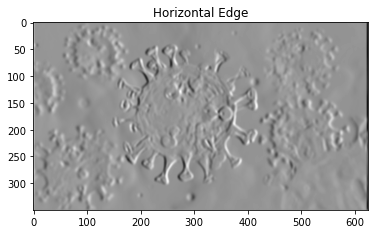

Image Shape : (350, 625)
Kernel Shape : (7, 7)
Output Image size : (350, 625)


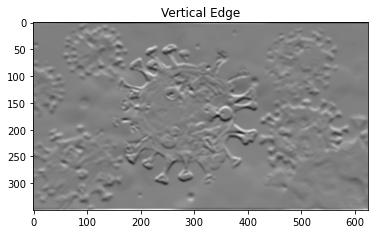

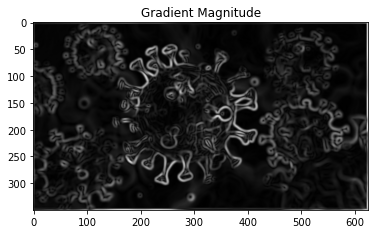

In [159]:
filters = np.array([[-3,-2,-1, 0, 1,2,3], 
                   [-4,-3,-2, 0, 2,3,4], 
                   [-5,-4,-3, 0, 3,4,5], 
                   [-6,-5,-4, 0, 4,5,6],
                   [-5,-4,-3, 0, 3,4,5],
                   [-4,-3,-2, 0, 2,3,4],
                   [-3,-2,-1, 0, 1,2,3]])
sobelImage = sobel_edge_detection(manGray, filters, verbose=True)

Image Shape : (450, 800)
Kernel Shape : (7, 7)
Output Image size : (450, 800)


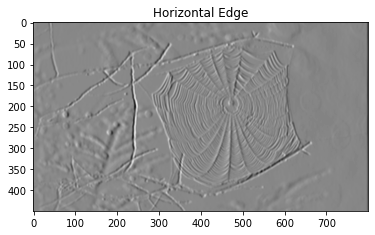

Image Shape : (450, 800)
Kernel Shape : (7, 7)
Output Image size : (450, 800)


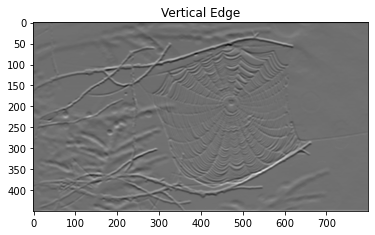

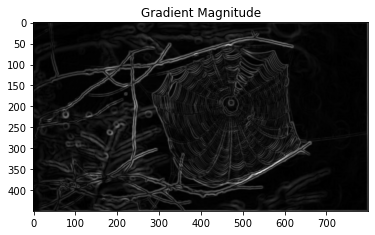

In [160]:
sobelImage = sobel_edge_detection(grayImage, filters, verbose=True)

5.  (20 points) Suppose you apply the Sobel operator to each of the RGB color bands of a color image.  How might you combine these results into a color edge detector (5 points)?  Do the resulting edge differ from the gray scale results?  How and why (5 points)? You may compare the edge maps of the intensity image (of the color image), the gray-scale edge map that are the combination of the three edge maps from three color bands, or a real color edge map that edge points have colors (5 points). Please discuss their similarities and differences, and how each of them can be used for image enhancement or feature extraction (5 points). Note that you want to first generate gradient maps and then using thresholding to generate edge maps.  In the end, please try to generate a color sketch of an image, such as the ID image of Prof. Zhu. You may also consider local, adaptive thresholding in generating a color edge map.

# For color bands we can use sobel for each band then superimpose the results. The results are very similar to the gray scale result reinforcing the NTSC ratio for images. For the edge maps we see that the 1x2 operator flourish using this man made image when accounting for the color and converting to gray scale as a superposition. However, when the color bands are analyzed and normalized on their own the edge map is poor. For the isolated analysis we see that the R channel is accounting for most of the behavior. When the channels are combined the normalization behaves differently and yields more intelligible results, which is why normalization is so important.

In [136]:
R,G,B = manImage[:,:,0], manImage[:,:,1], manImage[:,:,2]

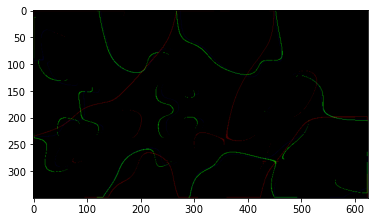

In [139]:
cR= canny(R,np.std(R),-50, 0)
cG= canny(G,np.std(G),-50, 0)
cB= canny(B,np.std(B),-50, 0)
cSob = np.stack((0.2989*cR ,0.5870*cG ,0.1140*cB), axis=-1)
plt.imshow(cSob)

Your percent of pixels for edgemap is 44.04662857142857


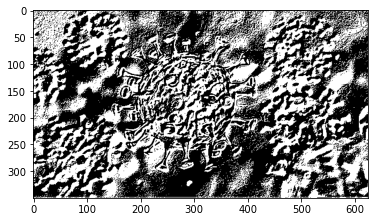

In [144]:
c = 0.2989*R + 0.5870*G + 0.1140*B
edges = edgemap(oneByTwo(c))
plt.imshow(edges,cmap='gray')

Your percent of pixels for edgemap is 0.0


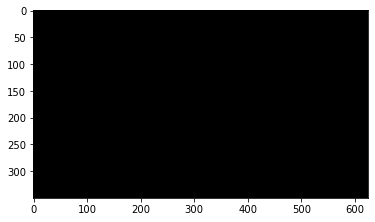

In [146]:
edges = edgemap(c)
plt.imshow(edges,cmap='gray')

Your percent of pixels for edgemap is 0.19748571428571426
Your percent of pixels for edgemap is 0.0
Your percent of pixels for edgemap is 0.0


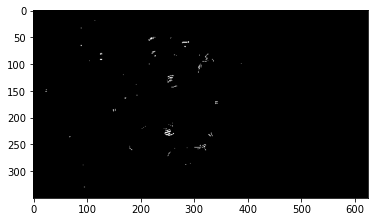

In [154]:
eR= edgemap(R)
eG= edgemap(G)
eB= edgemap(B)

plt.imshow(eR,cmap='gray')

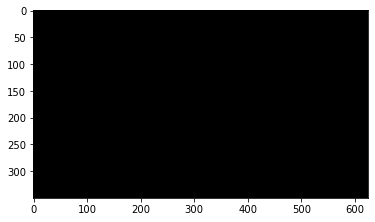

In [153]:
plt.imshow(eG,cmap='gray')

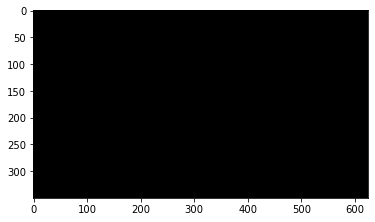

In [152]:
plt.imshow(eB,cmap='gray')

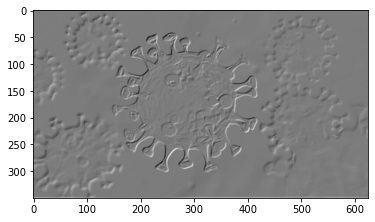

In [155]:
plt.imshow(oneByTwo(R),cmap='gray')

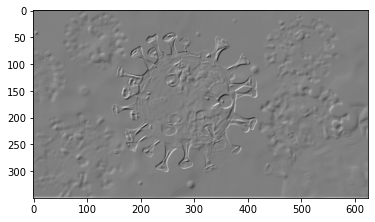

In [156]:
plt.imshow(oneByTwo(G),cmap='gray')

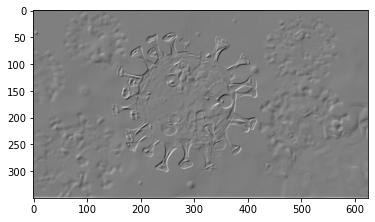

In [157]:
plt.imshow(oneByTwo(B),cmap='gray')